In [5]:
import os
os.getcwd()

'/Users/a24/Desktop/pyskillup/CodeIntelligence/StableDiffusion/sd'

In [6]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
    
print(f"Using device {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

Using device cpu


  0%|          | 0/50 [00:00<?, ?it/s]

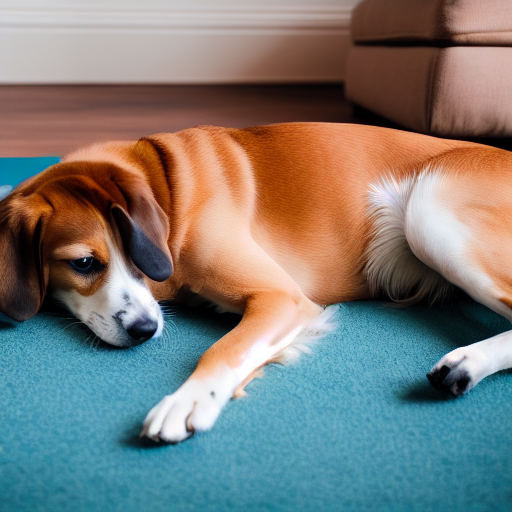

In [9]:
## TEXT to IMAGE

prompt = "A dog stretching on the floor, centered object ,ears location, highly detailed, ultra sharp, cinematic, 8k resolution"
uncond_prompt = "((big hands, un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime)), ((ugly mouth, ugly eyes, missing teeth, crooked teeth, close up cropped, out of frame)), worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated" # You can use it as a negative prompt
do_cfg = True
cfg_scale = 7

## IMAGE to IMAGE

input_image = None
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
strength = 0.9
sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps= num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)
Image.fromarray(output_image)